In [1]:
import pandas as pd
import numpy as np

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
data = pd.read_csv(url, names=column_names, na_values='?')

# Clean data
data = data.dropna()
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification

# Split into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split into training & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data shape:", X.shape)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Data shape: (297, 13)
Training samples: 237
Test samples: 60


In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the model
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Evaluate accuracy
train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Training Accuracy: 0.85
Test Accuracy: 0.78


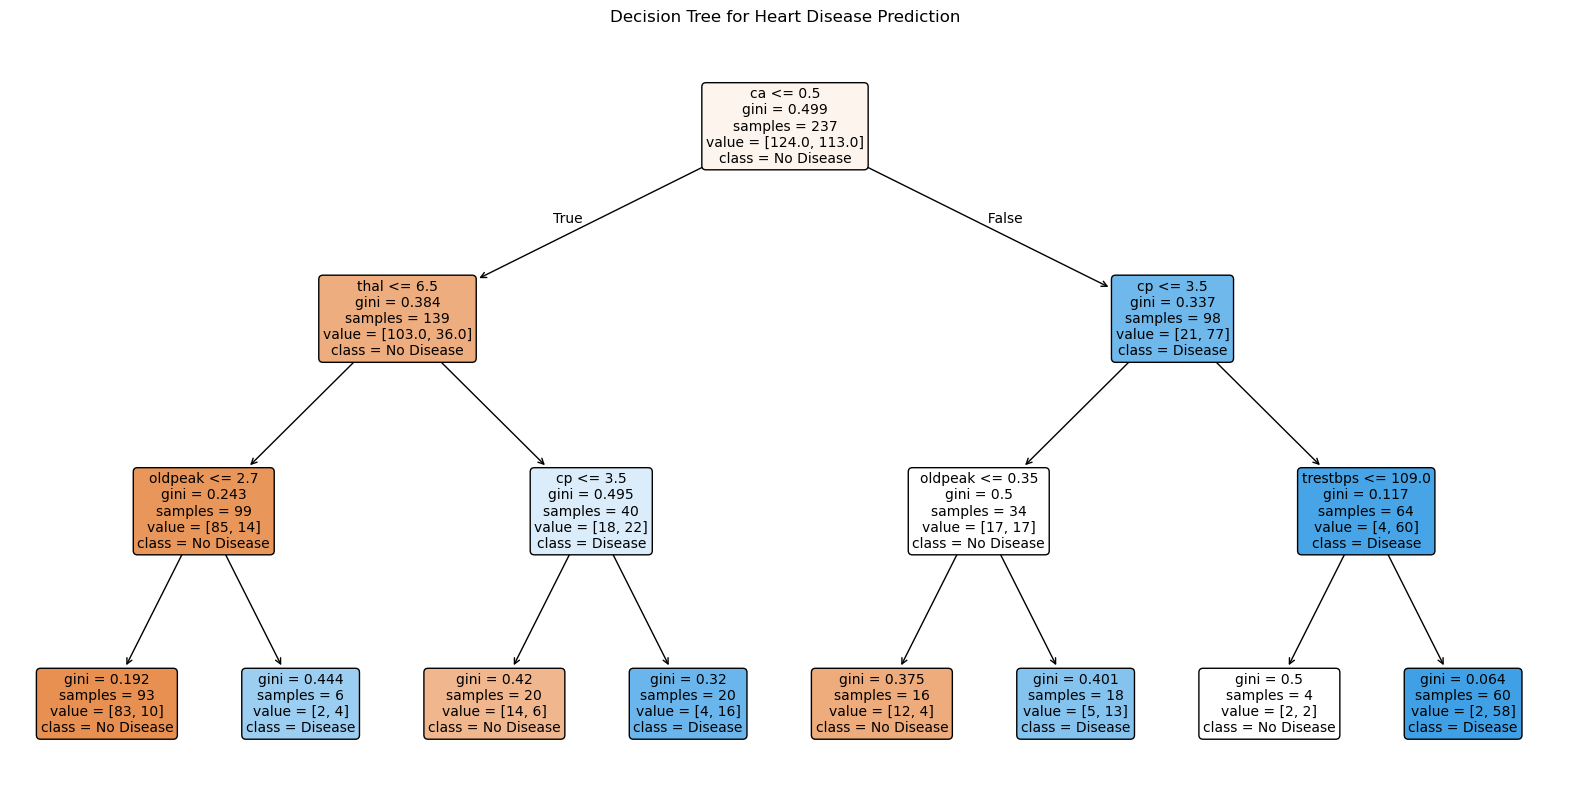

In [3]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Heart Disease Prediction")
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

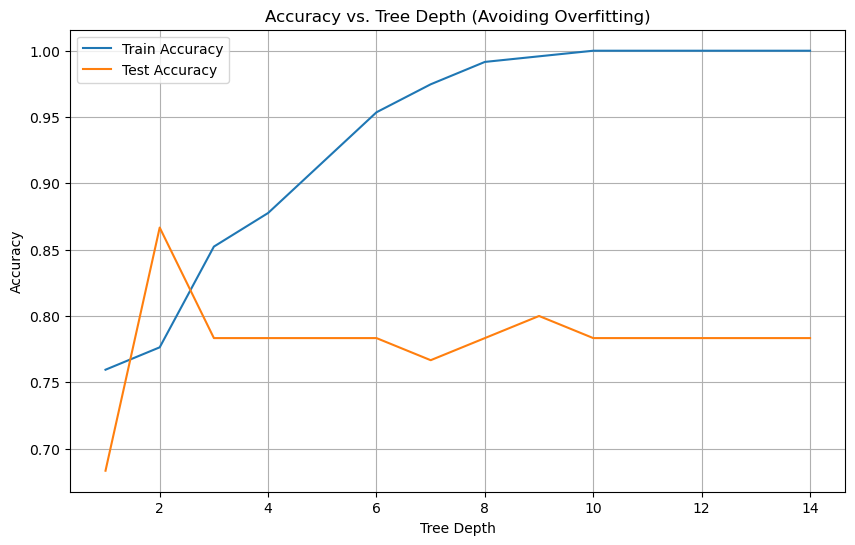

In [4]:
train_acc = []
test_acc = []
max_depths = range(1, 15)

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_acc.append(dt.score(X_train, y_train))
    test_acc.append(dt.score(X_test, y_test))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_acc, label='Train Accuracy')
plt.plot(max_depths, test_acc, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Tree Depth (Avoiding Overfitting)')
plt.legend()
plt.grid()
plt.savefig('overfitting_analysis.png')
plt.show()

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Compare accuracies
dt_acc = dt.score(X_test, y_test)
rf_acc = rf.score(X_test, y_test)
print(f"Decision Tree Accuracy: {dt_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")

Decision Tree Accuracy: 0.78
Random Forest Accuracy: 0.88


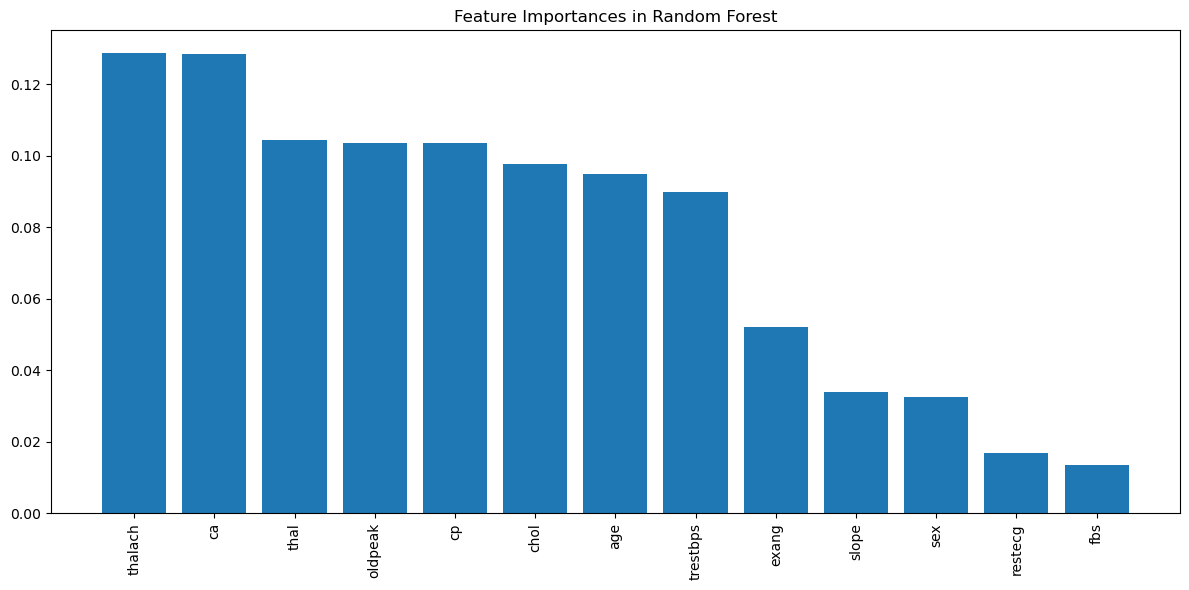

In [6]:
# Get feature importances
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title('Feature Importances in Random Forest')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

In [7]:
from sklearn.model_selection import cross_val_score

# 5-fold CV for Decision Tree
dt_scores = cross_val_score(dt, X, y, cv=5)
print(f"Decision Tree CV Accuracy: {np.mean(dt_scores):.2f} ± {np.std(dt_scores):.2f}")

# 5-fold CV for Random Forest
rf_scores = cross_val_score(rf, X, y, cv=5)
print(f"Random Forest CV Accuracy: {np.mean(rf_scores):.2f} ± {np.std(rf_scores):.2f}")

Decision Tree CV Accuracy: 0.75 ± 0.06
Random Forest CV Accuracy: 0.81 ± 0.04
